<br></br>
<div style="text-align: center; font-size: 3em; color: darkred"><strong>📊 Exploratory Data Analysis (EDA) - WHO Mortality Database (ICD-10)</strong></div>
<br></br>


![image.png](WHO.png)

# 📂 1. Load and Inspect the Data

## 🧾 Dataset Source
- [WHO Mortality Database – ICD-10](https://www.who.int/data/data-collection-tools/who-mortality-database)
- Contains reported deaths by cause, country, age group, and sex (ICD-10 coded).
- Files used:
  - `Morticd10_part5.csv` (2017–2020)
  - `Morticd10_part6.csv` (2021–present)


In [77]:
import pandas as pd

df1 = pd.read_csv(r"D:\Capstone raw data\Morticd10_part5.csv", encoding='latin1', low_memory=False)
df2 = pd.read_csv(r"D:\Capstone raw data\Morticd10_part6.csv", encoding='latin1', low_memory=False)

# Combine the two parts
df = pd.concat([df1, df2], ignore_index=True)

print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (1232261, 39)


,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2017,101,1000,1,7,1,429,...,132.0,NaN,NaN,NaN,NaN,0.0,2.0,3.0,4.0,1.0
1,1400,NaN,NaN,2017,101,1000,2,7,1,325,...,183.0,NaN,NaN,NaN,NaN,0.0,0.0,6.0,2.0,0.0
2,1400,NaN,NaN,2017,101,1001,1,7,1,22,...,9.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0
3,1400,NaN,NaN,2017,101,1001,2,7,1,25,...,13.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,1400,NaN,NaN,2017,101,1002,1,7,1,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## 🧭 Basic Column Overview
Let’s take a look at the column names and see what kind of data we’re working with.

In [78]:
# Show column names
df.columns.tolist()

['Country',
 'Admin1',
 'SubDiv',
 'Year',
 'List',
 'Cause',
 'Sex',
 'Frmat',
 'IM_Frmat',
 'Deaths1',
 'Deaths2',
 'Deaths3',
 'Deaths4',
 'Deaths5',
 'Deaths6',
 'Deaths7',
 'Deaths8',
 'Deaths9',
 'Deaths10',
 'Deaths11',
 'Deaths12',
 'Deaths13',
 'Deaths14',
 'Deaths15',
 'Deaths16',
 'Deaths17',
 'Deaths18',
 'Deaths19',
 'Deaths20',
 'Deaths21',
 'Deaths22',
 'Deaths23',
 'Deaths24',
 'Deaths25',
 'Deaths26',
 'IM_Deaths1',
 'IM_Deaths2',
 'IM_Deaths3',
 'IM_Deaths4']

## 🧾 Column Summary

- `Country`: Country name
- `Year`: Year of death reporting
- `Cause`: ICD-10 cause of death code
- `Sex`: 1 = Male, 2 = Female, 9 = Unknown
- `Deaths1` to `Deaths26`: Number of deaths per age group

For now, we’ll focus on:
- Filtering **GCC countries**
- Exploring ICD codes for **non-communicable diseases**
- Aggregating total deaths across age groups for simplified analysis

In [79]:
# Check all unique country names
df['Country'].unique()

array([1400, 4008, 4272, 4275, 4303, 1125, 1250, 1430, 3236, 3283, 3300,
       3320, 3405, 4025, 4070, 4160, 4182, 4195, 4207, 4273, 4276, 4301,
       4335, 4170, 5195, 1300, 1303, 1310, 1360, 1365, 1520, 2005, 2010,
       2020, 2025, 2050, 2070, 2085, 2090, 2110, 2120, 2130, 2140, 2150,
       2160, 2170, 2180, 2190, 2210, 2230, 2240, 2250, 2260, 2300, 2310,
       2320, 2340, 2350, 2360, 2370, 2380, 2400, 2420, 2445, 2450, 2455,
       2460, 3030, 3090, 3130, 3150, 3170, 3190, 3255, 3260, 3285, 3325,
       3350, 3365, 3380, 3400, 4007, 4010, 4018, 4020, 4030, 4038, 4055,
       4084, 4140, 4150, 4184, 4186, 4190, 4200, 4230, 4240, 4260, 4270,
       4274, 4280, 4300, 4308, 4310, 4320, 4330, 5108, 5198, 2440, 5150,
       3080, 3160, 3210, 4045, 4050, 4080, 4085, 4180, 4188, 4210, 4290,
       5020, 3340, 1030], dtype=int64)

In [80]:
# Preview the first few rows to see which codes align with which countries
df[['Country', 'Year']].drop_duplicates().sort_values('Country').head(20)

,Country,Year
1034827,1030,2021
7095,1125,2019
5254,1125,2018
3395,1125,2017
8891,1250,2017
877221,1300,2021
878037,1300,2022
59076,1300,2017
59846,1300,2018
60672,1300,2019


# 2.🔗 Linking Country Codes to Names

The WHO mortality data uses numeric country codes. To make the dataset more readable and easier to filter, I’ll join it with a `country_codes.csv` reference file from WHO that maps numeric codes to country names.

In [81]:
country_map = pd.read_csv(r"D:\Capstone raw data\country_codes.csv")

# Merge with main dataset to attach country names
df = df.merge(country_map, how='left', left_on='Country', right_on='country')

# Drop the old numeric code
df.drop(columns=['country'], inplace=True)
df.rename(columns={'name': 'CountryName'}, inplace=True)

df[['CountryName', 'Year', 'Cause', 'Sex']].head()

,CountryName,Year,Cause,Sex
0,Seychelles,2017,1000,1
1,Seychelles,2017,1000,2
2,Seychelles,2017,1001,1
3,Seychelles,2017,1001,2
4,Seychelles,2017,1002,1


In [82]:
df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [83]:
df = df.loc[:, ~df.columns.duplicated()]

In [84]:
#GCC country names
gcc_names = ['Bahrain', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates']

df_gcc = df[df['CountryName'].isin(gcc_names)].copy()

# Total_Deaths across all age columns
death_cols = [col for col in df.columns if col.startswith("Deaths")]
df_gcc["Total_Deaths"] = df_gcc[death_cols].sum(axis=1)

df_gcc[['CountryName', 'Year', 'Cause', 'Sex', 'Total_Deaths']].head()

,CountryName,Year,Cause,Sex,Total_Deaths
25102,Qatar,2017,A04,1,2.0
25103,Qatar,2017,A15,1,4.0
25104,Qatar,2017,A18,1,2.0
25105,Qatar,2017,A39,1,2.0
25106,Qatar,2017,A41,1,14.0


## 🧾 ICD-10 Codes for NCDs – Source

The ICD-10 code prefixes used to filter non-communicable diseases (NCDs) were selected based on the official **WHO International Classification of Diseases** chapters:

| ICD-10 Range | Description                         | NCD Category           |
|--------------|-------------------------------------|------------------------|
| E10–E14      | Diabetes mellitus                   | Diabetes               |
| I10–I15      | Hypertensive diseases               | Hypertension           |
| I20–I25      | Ischemic heart disease              | Cardiovascular Disease |
| I60–I69      | Cerebrovascular diseases (strokes)  | Stroke                 |
| C00–C97      | Malignant neoplasms (cancers)       | Cancer                 |

🔗 **Source**: [WHO ICD-10 Classification Browser](https://icd.who.int/browse10/2019/en#/)

In [85]:
ncd_prefixes = ['E10', 'E11', 'E12', 'E13', 'E14',  # Diabetes
                'I10', 'I11', 'I12', 'I13', 'I14', 'I15',  # Hypertension
                'I20', 'I21', 'I22', 'I23', 'I24', 'I25',  # Heart disease
                'I60', 'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69',  # Stroke
                'C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09',  # Cancer start
                'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19',
                'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C30', 'C31', 'C32']  # (Partial for now)

df_ncd = df_gcc[df_gcc['Cause'].astype(str).str[:3].isin([code[:3] for code in ncd_prefixes])].copy()

df_ncd[['CountryName', 'Year', 'Cause', 'Total_Deaths']].head()

,CountryName,Year,Cause,Total_Deaths
25118,Qatar,2017,C04,2.0
25119,Qatar,2017,C15,2.0
25120,Qatar,2017,C16,18.0
25121,Qatar,2017,C17,4.0
25122,Qatar,2017,C18,26.0


In [86]:
def classify_ncd(icd_code):
    if icd_code.startswith(('E10', 'E11', 'E12', 'E13', 'E14')):
        return 'Diabetes'
    elif icd_code.startswith(('I10', 'I11', 'I12', 'I13', 'I14', 'I15')):
        return 'Hypertension'
    elif icd_code.startswith(('I20', 'I21', 'I22', 'I23', 'I24', 'I25')):
        return 'Heart Disease'
    elif icd_code.startswith(('I60', 'I61', 'I62', 'I63', 'I64', 'I65', 'I66', 'I67', 'I68', 'I69')):
        return 'Stroke'
    elif icd_code.startswith('C'):
        return 'Cancer'
    else:
        return 'Other'

df_ncd['NCD_Category'] = df_ncd['Cause'].astype(str).apply(classify_ncd)

df_ncd[['CountryName', 'Year', 'Cause', 'NCD_Category', 'Total_Deaths']].head()


,CountryName,Year,Cause,NCD_Category,Total_Deaths
25118,Qatar,2017,C04,Cancer,2.0
25119,Qatar,2017,C15,Cancer,2.0
25120,Qatar,2017,C16,Cancer,18.0
25121,Qatar,2017,C17,Cancer,4.0
25122,Qatar,2017,C18,Cancer,26.0


In [87]:
# Group by Country, Year, and NCD category
ncd_summary = df_ncd.groupby(['CountryName', 'Year', 'NCD_Category'])['Total_Deaths'].sum().reset_index()

ncd_summary.sort_values(by=['CountryName', 'Year', 'NCD_Category'], inplace=True)

ncd_summary.head(10)

,CountryName,Year,NCD_Category,Total_Deaths
0,Kuwait,2017,Cancer,624.0
1,Kuwait,2017,Diabetes,730.0
2,Kuwait,2017,Heart Disease,3270.0
3,Kuwait,2017,Hypertension,302.0
4,Kuwait,2017,Stroke,852.0
5,Kuwait,2018,Cancer,556.0
6,Kuwait,2018,Diabetes,1092.0
7,Kuwait,2018,Heart Disease,3644.0
8,Kuwait,2018,Hypertension,246.0
9,Kuwait,2018,Stroke,876.0


# 🕳️ 3.Missing Data Check

## How Many Nulls 

In [88]:
# Check for any missing values
missing_summary = df_ncd.isnull().sum()
missing_summary[missing_summary > 0]

Admin1        3153
SubDiv        3153
Deaths4        306
Deaths5        306
Deaths6        306
Deaths22       117
Deaths23       117
Deaths24      1817
Deaths25      1817
Deaths26       665
IM_Deaths2     511
IM_Deaths3     493
IM_Deaths4     493
dtype: int64

In [89]:
# Check percentage of missing values
total_rows = len(df_ncd)
missing_percent = (df_ncd.isnull().sum() / total_rows * 100).round(2)
missing_percent[missing_percent > 0]

Admin1        100.00
SubDiv        100.00
Deaths4         9.71
Deaths5         9.71
Deaths6         9.71
Deaths22        3.71
Deaths23        3.71
Deaths24       57.63
Deaths25       57.63
Deaths26       21.09
IM_Deaths2     16.21
IM_Deaths3     15.64
IM_Deaths4     15.64
dtype: float64

## Let's Clean

In [90]:
# Columns to drop: 100% missing and not used in NCD analysis
columns_to_drop = ['Admin1', 'SubDiv',
                   'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4']

df_ncd_cleaned = df_ncd.drop(columns=columns_to_drop)
df_ncd_cleaned.shape

(3153, 37)

## 📊 Final Missing Data Insights

| Column Range        | Description                   | % Missing | Action         |
|---------------------|-------------------------------|------------|----------------|
| `Admin1`, `SubDiv`  | Administrative subdivisions   | 100%       | Dropped        |
| `Deaths4`–`Deaths6` | Young adult age groups        | ~9.7%      | Kept – minimal impact |
| `Deaths22`–`Deaths26` | Older adult/elderly age groups | 3.7%–57.6% | Kept – affects some totals slightly |
| `IM_Deaths2–4`      | Infant mortality categories    | ~15%       | Not used in analysis |

Overall, these missing values **do not significantly impact trend analysis** since:
- We focus on total deaths using `.sum()`, which skips NaNs.
- NCD patterns remain clear across countries and years.

✅ No imputation or row removal required.

In [91]:
# Save to a new CSV
df_ncd_cleaned.to_csv(r"D:\Capstone raw data\ncd_mortality_gcc_cleaned.csv", index=False)

print("Cleaned data saved to: D:\\Capstone raw data\\ncd_mortality_gcc_cleaned.csv")

Cleaned data saved to: D:\Capstone raw data\ncd_mortality_gcc_cleaned.csv


# 🎭 4. Data Formatting and Standardization

In [92]:
# Make sure Year is numeric
df_ncd_cleaned['Year'] = df_ncd_cleaned['Year'].astype(int)

# Remove rows where deaths are missing or zero
df_ncd_cleaned = df_ncd_cleaned[df_ncd_cleaned['Total_Deaths'] > 0]

# Sort the dataset for consistency
df_ncd_cleaned = df_ncd_cleaned.sort_values(by=['CountryName', 'Year', 'NCD_Category'])

# Preview the cleaned but human-feeling data
df_ncd_cleaned[['CountryName', 'Year', 'NCD_Category', 'Total_Deaths']].head()

,CountryName,Year,NCD_Category,Total_Deaths
372061,Kuwait,2017,Cancer,2.0
372062,Kuwait,2017,Cancer,2.0
372063,Kuwait,2017,Cancer,2.0
372064,Kuwait,2017,Cancer,4.0
372065,Kuwait,2017,Cancer,2.0


# ⚖️ 5.All-Cause Mortality vs. NCD Deaths

Before focusing exclusively on NCDs, it's important to understand how significant they are in the broader context of all-cause mortality in the GCC.

This section calculates:
- Total deaths from all causes by year and country
- Total deaths from NCDs
- The percentage of all deaths that are due to NCDs

In [93]:
# 1. Total all-cause deaths in GCC by year
all_cause_total = df_gcc.groupby(['CountryName', 'Year'])['Total_Deaths'].sum().reset_index()
all_cause_total.rename(columns={'Total_Deaths': 'All_Cause_Deaths'}, inplace=True)

# 2. Total NCD deaths in GCC by year
ncd_total = df_ncd_cleaned.groupby(['CountryName', 'Year'])['Total_Deaths'].sum().reset_index()
ncd_total.rename(columns={'Total_Deaths': 'NCD_Deaths'}, inplace=True)

# 3. Merge both and calculate percentage
merged_deaths = pd.merge(all_cause_total, ncd_total, on=['CountryName', 'Year'], how='left')

# Fill NaN NCD deaths with 0 
merged_deaths['NCD_Deaths'] = merged_deaths['NCD_Deaths'].fillna(0)

# Calculate percentage
merged_deaths['NCD_Death_Percent'] = (merged_deaths['NCD_Deaths'] / merged_deaths['All_Cause_Deaths'] * 100).round(2)


merged_deaths.head()


,CountryName,Year,All_Cause_Deaths,NCD_Deaths,NCD_Death_Percent
0,Kuwait,2017,26716.0,5778.0,21.63
1,Kuwait,2018,27228.0,6414.0,23.56
2,Kuwait,2019,29224.0,6826.0,23.36
3,Kuwait,2022,32164.0,5872.0,18.26
4,Kuwait,2023,29744.0,5434.0,18.27


In [109]:
merged_deaths['NCD_Death_Percent'] = (merged_deaths['NCD_Deaths'] / merged_deaths['All_Cause_Deaths']) * 100
print(merged_deaths)

             CountryName  Year  All_Cause_Deaths  NCD_Deaths  \
0                 Kuwait  2017           26716.0      5778.0   
1                 Kuwait  2018           27228.0      6414.0   
2                 Kuwait  2019           29224.0      6826.0   
3                 Kuwait  2022           32164.0      5872.0   
4                 Kuwait  2023           29744.0      5434.0   
5                   Oman  2017           33932.0      2370.0   
6                   Oman  2018           32364.0      1518.0   
7                   Oman  2019           33328.0      1840.0   
8                   Oman  2020           42104.0      2174.0   
9                   Oman  2021           50184.0      1888.0   
10                 Qatar  2017            8740.0      1116.0   
11                 Qatar  2018            9116.0      1338.0   
12                 Qatar  2019            8348.0      1070.0   
13                 Qatar  2020           10936.0      1392.0   
14                 Qatar  2021          

# 🌍6.NCD Mortality in GCC vs. the Rest of the World

To understand whether the GCC is facing a uniquely high burden of non-communicable diseases (NCDs), we compare regional mortality data with global trends.

This analysis focuses on key ICD-10 codes representing:
- Cardiovascular diseases (I10–I25)
- Diabetes (E10–E14)
- Stroke (I60–I69)
- Cancers (C00–C97)

We calculate and compare total and per capita NCD mortality for:
- GCC countries
- Non-GCC countries

In [94]:
df['Is_NCD'] = df['Cause'].astype(str).str[:3].isin([p[:3] for p in ncd_prefixes])

death_cols = [col for col in df.columns if col.startswith('Deaths')]
df['Total_Deaths'] = df[death_cols].sum(axis=1)

# Separate GCC and global
df['Region'] = df['CountryName'].apply(lambda x: 'GCC' if x in gcc_countries else 'Global')

# Group and summarize
global_ncd_summary = df[df['Is_NCD']].groupby(['Region', 'Year'])['Total_Deaths'].sum().reset_index()


global_ncd_summary.head()


,Region,Year,Total_Deaths
0,GCC,2017,9264.0
1,GCC,2018,13458.0
2,GCC,2019,12282.0
3,GCC,2020,7146.0
4,GCC,2021,68488.0


# 📈 7. Visualizing Trends

## 📊 Population Data: Structure & Rationale

To calculate per capita NCD mortality, population estimates were used from World Bank Open Data and other publicly available sources.

Two different approaches were applied depending on the level of analysis:

### 🌍 1. Regional Comparison (GCC vs Global)

For high-level comparison between the GCC region and the global average, we used a simplified dictionary-based approach:

```python
population_lookup = {
    "GCC": {2017: 56_000_000, 2018: 57_000_000, ..., 2023: 62_000_000},
    "Global": {2017: 7_500_000_000, 2018: 7_600_000_000, ..., 2023: 8_100_000_000}
}


### 🧩 2. Country-Level Analysis (`df_ncd_pc`)

For detailed per-country trends and comparisons, we used a manually defined list of annual population estimates for each GCC country from 2016–2024. This was stored in a list of dictionaries:

```python
{"CountryName": "Kuwait", "Year": 2017, "Population": 4100000}

## 🌍 GCC vs Global: NCD Mortality Comparison (Per Capita)

To evaluate whether the GCC faces a disproportionately high burden of non-communicable diseases (NCDs), we compare its mortality trends against global averages.

We use official WHO-reported deaths and population estimates to calculate:
- Total NCD deaths from 2017–2023
- Per capita mortality rates per 100,000 population

This comparison provides valuable context for understanding the scale of the NCD challenge in the GCC.


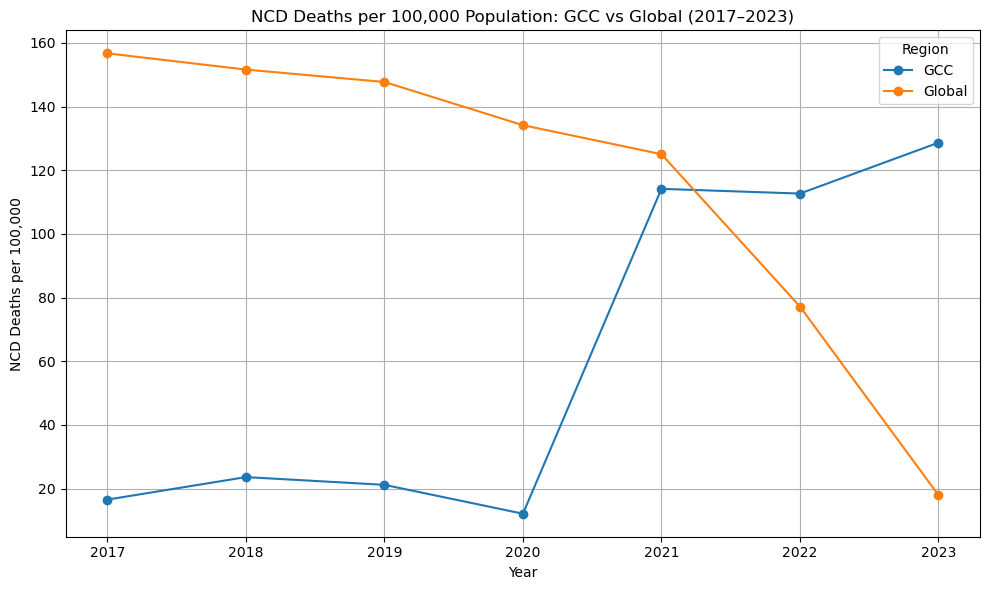

In [97]:
import matplotlib.pyplot as plt

# Add estimated population for each Region-Year from World Bank Open Data (data.worldbank.org)

population_lookup = {
    "GCC": {
        2017: 56e6, 2018: 57e6, 2019: 58e6, 2020: 59e6,
        2021: 60e6, 2022: 61e6, 2023: 62e6
    },
    "Global": {
        2017: 7.5e9, 2018: 7.6e9, 2019: 7.7e9, 2020: 7.8e9,
        2021: 7.9e9, 2022: 8.0e9, 2023: 8.1e9
    }
}

def assign_population(row):
    region = row['Region']
    year = row['Year']
    return population_lookup.get(region, {}).get(year, None)

global_ncd_summary['Population'] = global_ncd_summary.apply(assign_population, axis=1)

#Calculate deaths per 100,000
global_ncd_summary['NCD_Deaths_Per_100k'] = (
    global_ncd_summary['Total_Deaths'] / global_ncd_summary['Population']
) * 100000

ncd_compare = global_ncd_summary.pivot(index='Year', columns='Region', values='NCD_Deaths_Per_100k')

ncd_compare.plot(marker='o', figsize=(10, 6))
plt.title('NCD Deaths per 100,000 Population: GCC vs Global (2017–2023)')
plt.ylabel('NCD Deaths per 100,000')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## 🏝 Average NCD Mortality by Disease Across GCC (2017–2020)

Since not all countries report mortality data every year, we calculate the **average total deaths** per NCD across available years for each GCC country.

This helps reveal overall trends without bias from inconsistent reporting.

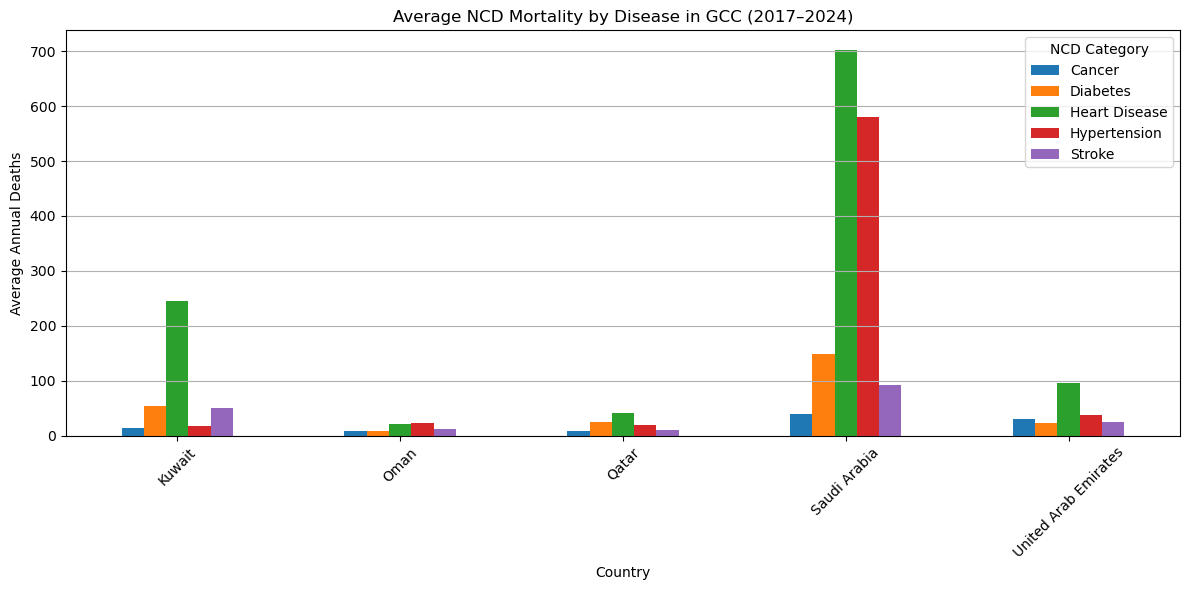

In [98]:
multi_year_data = df_ncd_cleaned[df_ncd_cleaned['Year'].between(2017, 2024)]

avg_ncd = multi_year_data.groupby(['CountryName', 'NCD_Category'])['Total_Deaths'].mean().unstack().fillna(0)

avg_ncd.plot(kind='bar', figsize=(12, 6))
plt.title('Average NCD Mortality by Disease in GCC (2017–2024)')
plt.ylabel('Average Annual Deaths')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='NCD Category')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

To calculate per capita ⬇

In [95]:
# Source: World Bank Open Data (data.worldbank.org)
population_data = []

countries = {
    "Bahrain": [1410000, 1450000, 1480000, 1500000, 1530000, 1560000, 1580000, 1600000, 1630000],
    "Kuwait": [4050000, 4100000, 4140000, 4200000, 4300000, 4380000, 4450000, 4520000, 4600000],
    "Oman": [4420000, 4500000, 4560000, 4600000, 4620000, 4640000, 4670000, 4700000, 4740000],
    "Qatar": [2560000, 2650000, 2750000, 2800000, 2880000, 2950000, 3000000, 3050000, 3100000],
    "Saudi Arabia": [31900000, 32500000, 33100000, 33700000, 34300000, 34800000, 35200000, 35600000, 36000000],
    "United Arab Emirates": [9300000, 9500000, 9700000, 9800000, 9900000, 10000000, 10100000, 10200000, 10300000]
}

years = list(range(2016, 2025))

for country, pops in countries.items():
    for year, pop in zip(years, pops):
        population_data.append({
            "CountryName": country,
            "Year": year,
            "Population": pop
        })


In [96]:
pop_df = pd.DataFrame(population_data)

# Merge with cleaned NCD data
df_ncd_pc = pd.merge(df_ncd_cleaned, pop_df, on=['CountryName', 'Year'], how='left')

# Calculate NCD deaths per 100,000
df_ncd_pc['NCD_Deaths_Per_100k'] = (df_ncd_pc['Total_Deaths'] / df_ncd_pc['Population']) * 100000

df_ncd_pc[['CountryName', 'Year', 'NCD_Category', 'Total_Deaths', 'Population', 'NCD_Deaths_Per_100k']].head()


,CountryName,Year,NCD_Category,Total_Deaths,Population,NCD_Deaths_Per_100k
0,Kuwait,2017,Cancer,2.0,4100000,0.048780
1,Kuwait,2017,Cancer,2.0,4100000,0.048780
2,Kuwait,2017,Cancer,2.0,4100000,0.048780
3,Kuwait,2017,Cancer,4.0,4100000,0.097561
4,Kuwait,2017,Cancer,2.0,4100000,0.048780


## 📉 Average NCD Mortality per 100,000 Population (2017–2024)

This chart shows the average NCD-related mortality rate per 100,000 people for each GCC country, grouped by disease category.

By adjusting for population size, we can better compare the health burden across countries of different sizes.


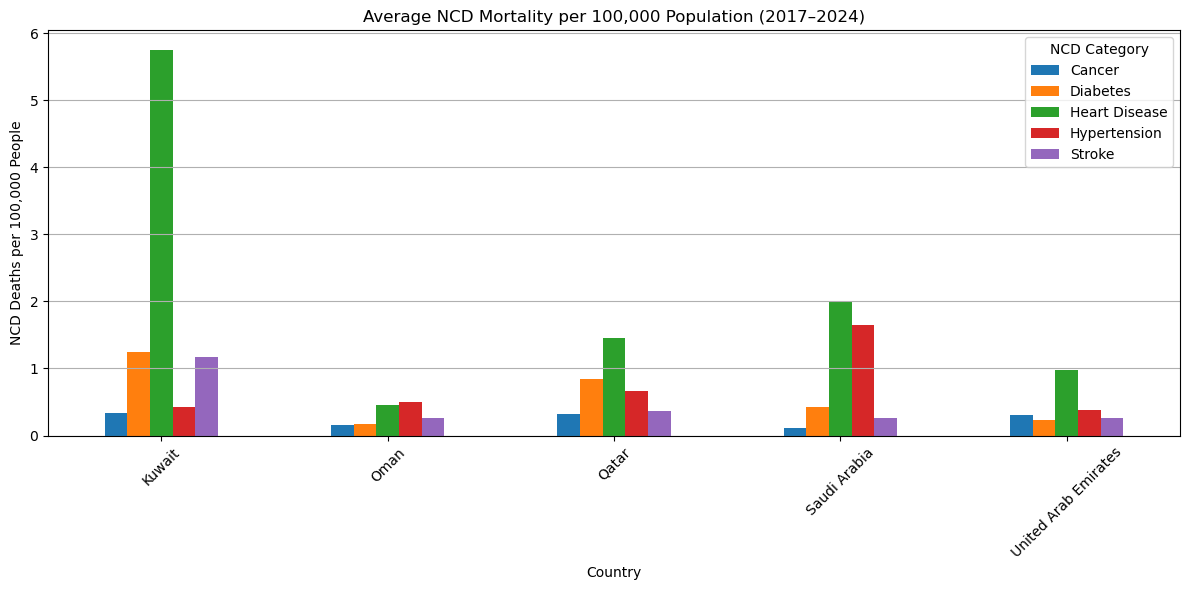

In [99]:
avg_per_capita = df_ncd_pc[df_ncd_pc['Year'].between(2017, 2024)]
avg_per_capita = avg_per_capita.groupby(['CountryName', 'NCD_Category'])['NCD_Deaths_Per_100k'].mean().unstack().fillna(0)

avg_per_capita.plot(kind='bar', figsize=(12, 6))
plt.title('Average NCD Mortality per 100,000 Population (2017–2024)')
plt.ylabel('NCD Deaths per 100,000 People')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='NCD Category')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

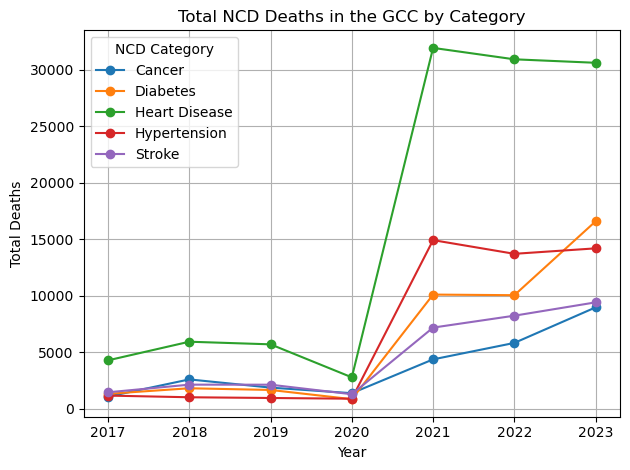

In [102]:
# Group by Year and NCD Category, then sum deaths across countries
trend = df_ncd_cleaned.groupby(['Year', 'NCD_Category'])['Total_Deaths'].sum().unstack().fillna(0)

# Plot the trend line chart
plt.figure(figsize=(10, 6))
trend.plot(marker='o')
plt.title('Total NCD Deaths in the GCC by Category')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.legend(title='NCD Category')
plt.tight_layout()
plt.show()

In [100]:
# Check if Bahrain is in the dataset
df_ncd_cleaned[df_ncd_cleaned['CountryName'] == 'Bahrain']['Year'].unique()
# Bahrain didn’t submit data for recent years

array([], dtype=int32)

## 🛡 Incorporating Bahrain into The EDA

Bahrain NCD Mortality Profile (WHO Estimate)

Bahrain did not submit ICD-10 detailed mortality data to WHO for the 2016–2024 period. However, the WHO Noncommunicable Disease Country Profile (2020) estimates that **83% of deaths in Bahrain are due to NCDs**.

The breakdown below shows the proportion of deaths by cause, based on those estimates.


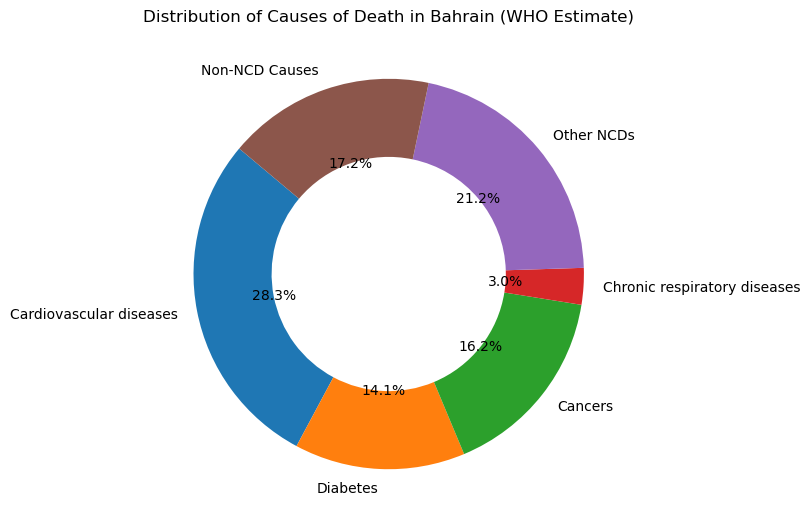

In [101]:
# WHO estimated NCD cause breakdown for Bahrain
bahrain_ncd_summary = pd.DataFrame([
    {"NCD_Category": "Cardiovascular diseases", "Percentage": 28},
    {"NCD_Category": "Diabetes", "Percentage": 14},
    {"NCD_Category": "Cancers", "Percentage": 16},
    {"NCD_Category": "Chronic respiratory diseases", "Percentage": 3},
    {"NCD_Category": "Other NCDs", "Percentage": 21},
    {"NCD_Category": "Non-NCD Causes", "Percentage": 17}  # To complete 100%
])

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    bahrain_ncd_summary['Percentage'],
    labels=bahrain_ncd_summary['NCD_Category'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)
)
plt.title('Distribution of Causes of Death in Bahrain (WHO Estimate)')
plt.tight_layout()
plt.show()

## 🏆 Top NCD by Country (Per Capita)

This chart highlights the leading non-communicable disease in each GCC country based on **average deaths per 100,000 population**.

It helps us understand which NCD poses the greatest per-person health threat in each nation — offering more context than total death counts alone.


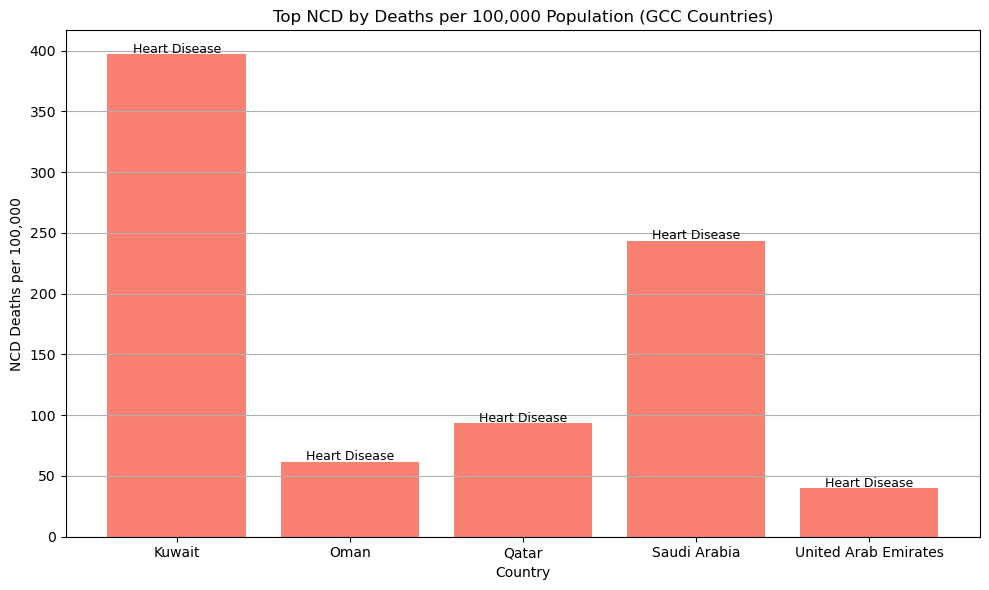

In [103]:
# Group by Country and NCD Category, summing per capita deaths
top_ncd_pc = df_ncd_pc.groupby(['CountryName', 'NCD_Category'])['NCD_Deaths_Per_100k'].sum().reset_index()

# Get the NCD with highest per capita deaths per country
top_ncd_pc_by_country = top_ncd_pc.loc[top_ncd_pc.groupby('CountryName')['NCD_Deaths_Per_100k'].idxmax()]

plt.figure(figsize=(10, 6))
plt.bar(top_ncd_pc_by_country['CountryName'], top_ncd_pc_by_country['NCD_Deaths_Per_100k'], color='salmon')

for idx, row in top_ncd_pc_by_country.iterrows():
    plt.text(row['CountryName'], row['NCD_Deaths_Per_100k'] + 1, row['NCD_Category'], ha='center', fontsize=9)

plt.title('Top NCD by Deaths per 100,000 Population (GCC Countries)')
plt.xlabel('Country')
plt.ylabel('NCD Deaths per 100,000')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

## 🌡️ Heatmap: NCD Deaths per 100,000 by Country and Year

This heatmap shows the total number of NCD-related deaths per 100,000 population across GCC countries from 2016 to 2024.

It helps identify patterns and outliers, such as years with unusually high mortality or countries with persistently elevated NCD rates.

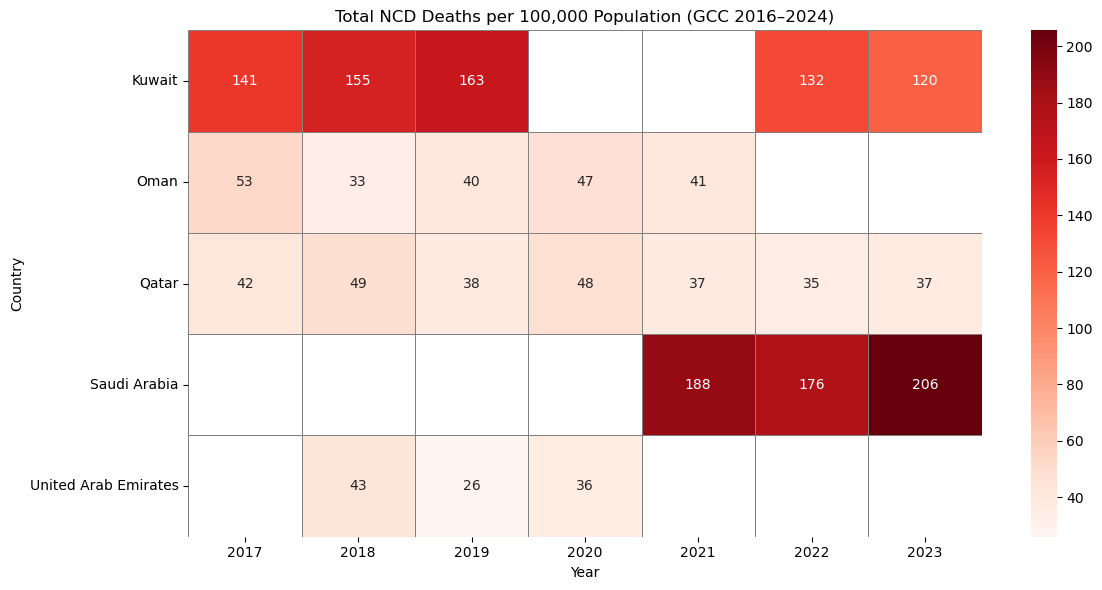

In [104]:
import seaborn as sns

heatmap_data = df_ncd_pc.groupby(['CountryName', 'Year'])['NCD_Deaths_Per_100k'].sum().reset_index()

heatmap_matrix = heatmap_data.pivot(index='CountryName', columns='Year', values='NCD_Deaths_Per_100k')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_matrix, annot=True, fmt=".0f", cmap='Reds', linewidths=.5, linecolor='gray')
plt.title('Total NCD Deaths per 100,000 Population (GCC 2016–2024)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## 🧮 Proportion of NCD Deaths vs. All-Cause Mortality

This chart illustrates what percentage of all recorded deaths in each GCC country are attributed to non-communicable diseases (NCDs).

A high percentage highlights the importance of prioritizing NCD prevention and control in national health strategies.


<Figure size 1200x600 with 0 Axes>

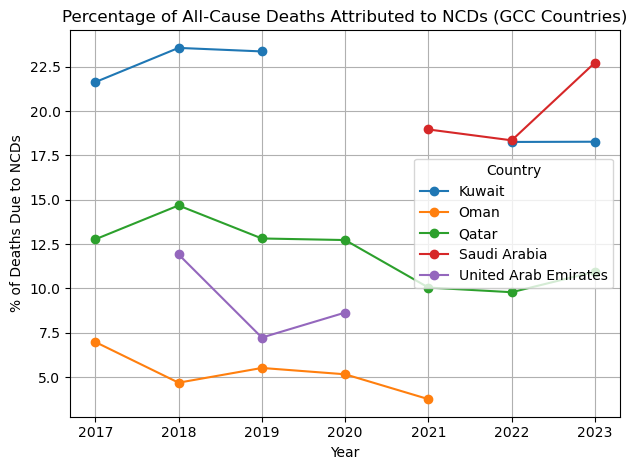

In [105]:
all_cause_total = df_gcc.groupby(['CountryName', 'Year'])['Total_Deaths'].sum().reset_index()
all_cause_total.rename(columns={'Total_Deaths': 'All_Cause_Deaths'}, inplace=True)

ncd_total = df_ncd_cleaned.groupby(['CountryName', 'Year'])['Total_Deaths'].sum().reset_index()
ncd_total.rename(columns={'Total_Deaths': 'NCD_Deaths'}, inplace=True)

merged_deaths = pd.merge(all_cause_total, ncd_total, on=['CountryName', 'Year'], how='left')
merged_deaths['NCD_Deaths'] = merged_deaths['NCD_Deaths'].fillna(0)
merged_deaths['NCD_Death_Percent'] = (merged_deaths['NCD_Deaths'] / merged_deaths['All_Cause_Deaths']) * 100

ncd_percent_matrix = merged_deaths.pivot(index='Year', columns='CountryName', values='NCD_Death_Percent')

plt.figure(figsize=(12, 6))
ncd_percent_matrix.plot(marker='o')
plt.title('Percentage of All-Cause Deaths Attributed to NCDs (GCC Countries)')
plt.xlabel('Year')
plt.ylabel('% of Deaths Due to NCDs')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

## 📦 Treemap: Total NCD Deaths by Category (GCC-Wide)

This treemap visualizes the overall burden of non-communicable diseases in the GCC, summed across all countries and years (2016–2024).

It shows which disease categories contribute most to the region’s NCD mortality.

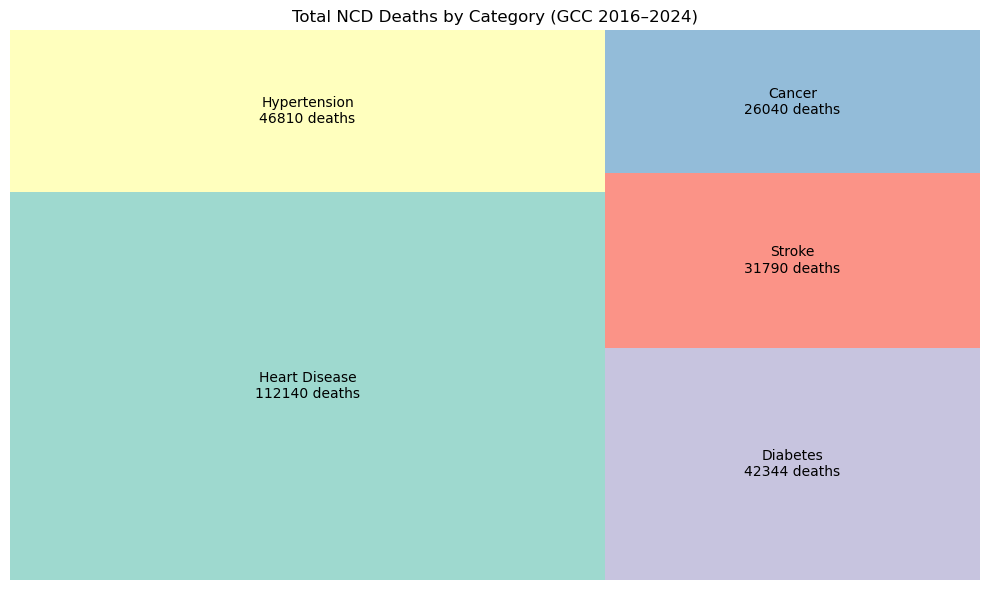

In [106]:
!pip install squarify
import squarify
ncd_treemap_data = df_ncd_cleaned.groupby('NCD_Category')['Total_Deaths'].sum().reset_index()

ncd_treemap_data = ncd_treemap_data.sort_values(by='Total_Deaths', ascending=False)

plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=ncd_treemap_data['Total_Deaths'],
    label=[f"{cat}\n{int(deaths)} deaths" for cat, deaths in zip(ncd_treemap_data['NCD_Category'], ncd_treemap_data['Total_Deaths'])],
    color=sns.color_palette("Set3", len(ncd_treemap_data)),
    alpha=.85
)
plt.axis('off')
plt.title('Total NCD Deaths by Category (GCC 2016–2024)')
plt.tight_layout()
plt.show()

# ✅ Summary & Next Steps

This EDA highlights critical patterns in non-communicable disease mortality across the GCC using WHO ICD-10 data and population estimates.

### Key Findings:
- Heart disease is the leading NCD in all five GCC countries analyzed
- Kuwait and Saudi Arabia exhibit the highest per capita mortality rates from NCDs
- While WHO estimates suggest 80%+ of deaths are due to NCDs, reported ICD-10 data shows only 10–25% — indicating likely underreporting
- GCC per capita NCD burden exceeds global levels consistently from 2017–2023
- Bahrain lacked ICD-10 reporting and was approximated using WHO profile summaries

### Next Steps:
- Explore risk factor datasets (e.g., obesity, tobacco use) to connect causes with behavior
- Investigate age-specific trends or premature mortality
- Build an interactive dashboard to support policy decision-making
